In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

ThompsonSAmpling class with beta distribution parameters for each treatments.
-select_treatment(): samples from each treatment's Beta distribution and selects the highest value
-update(): updates the beta parameters based on observeed treatment
-run_simulation(): runs the 100 day experiment

In [4]:
class ThompsonSampling:
    def __init__(self, n_treatments=10, n_days=100):
        self.n_treatments = n_treatments
        self.n_days = n_days
        
        #initialize Beta distribution parameters for each treatment
        self.alphas = np.ones(n_treatments)
        self.betas = np.ones(n_treatments)
        
        #track history
        self.choices = []
        self.rewards = []
        self.cumulative_rewards = []
        
    #select the best treatment for each experiment    
    def select_treatment(self):
        samples = [beta.rvs(a, b) for a, b in zip(self.alphas, self.betas)]
        return np.argmax(samples)
    
    #update beta distribution based on reward
    def update(self, treatment, reward):
        self.alphas[treatment] += reward
        self.betas[treatment] += (1 - reward)
        
        #track history
        self.choices.append(treatment)
        self.rewards.append(reward)
        self.cumulative_rewards.append(sum(self.rewards))
    
    def run_simulation(self, true_probabilities):
        for _ in range(self.n_days):
            treatment = self.select_treatment()
            #generate reward based on true probability
            reward = np.random.binomial(1, true_probabilities[treatment])
            self.update(treatment, reward)
    
    #more plots can be added
    def plot_results(self):
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        
        ax1.plot(self.choices, 'b.')
        ax1.set_xlabel('Day')
        ax1.set_ylabel('Treatment selected')
        ax1.set_title('Treatment select over time')
        ax1.grid(True)
        
        x = np.linspace(0, 1, 100)
        for i in range(self.n_treatments):
            y = beta.pdf(x, self.alphas[i], self.betas[i])
            ax2.plot(x, y, label=f'Treatment {i}')
        ax2.set_xlabel('Success Probability')
        ax2.set_ylabel('Density')
        ax2.set_title('Final Beta Distributions')
        ax2.legend()
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()

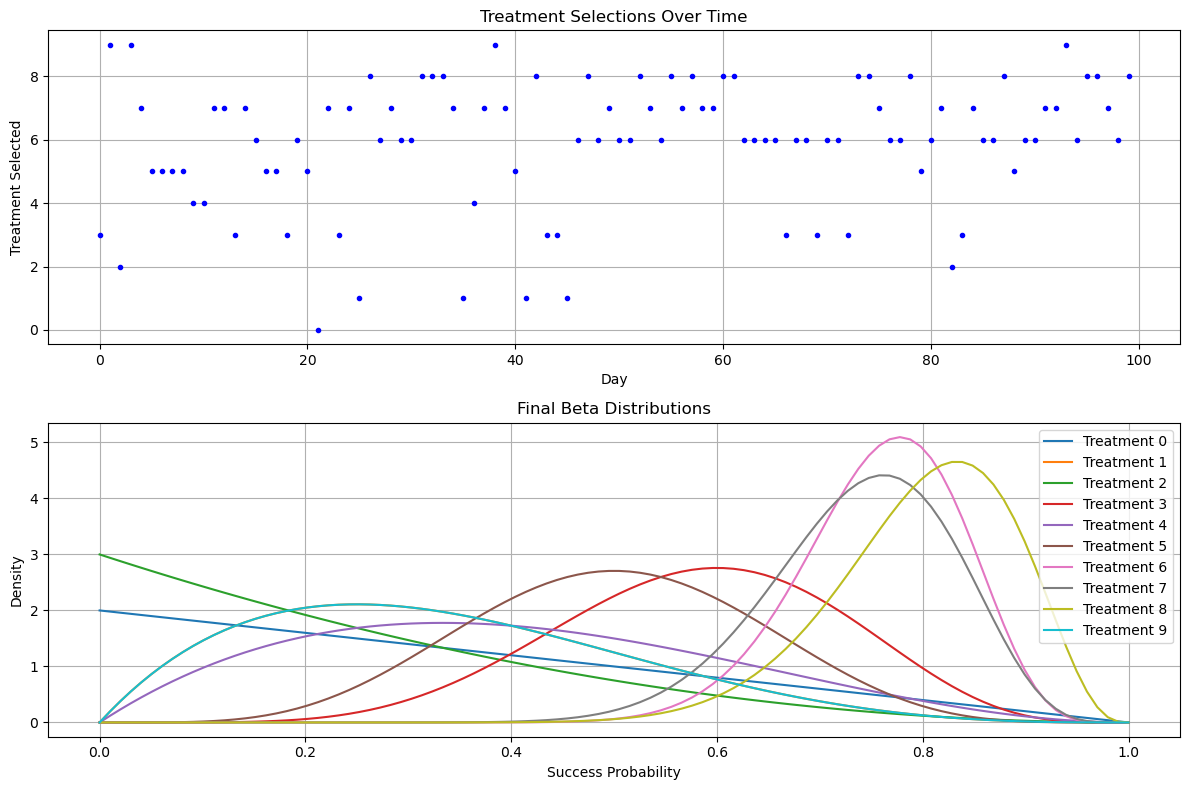

In [5]:
#arbitrarily set probabilities for each treatment
true_probabilities = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.15])

ts = ThompsonSampling()
ts.run_simulation(true_probabilities)
ts.plot_results()

We print the number of times each treatments have been used

In [6]:
unique, counts = np.unique(ts.choices, return_counts=True)
for treatment, count in zip(unique, counts):
    print(f"Treatment {treatment}: {count} times")

Treatment 0: 1 times
Treatment 1: 4 times
Treatment 2: 2 times
Treatment 3: 10 times
Treatment 4: 3 times
Treatment 5: 10 times
Treatment 6: 27 times
Treatment 7: 21 times
Treatment 8: 18 times
Treatment 9: 4 times
